In [1]:
import sys
sys.path.append("../")

import matplotlib.pyplot as plt
import keras
from bayesflow import Approximator
from bayesflow import OnlineDataset
from bayesflow.networks import CIF
from bayesflow.simulators import TwoMoonsSimulator

In [2]:
batch_size = 1024
dataset = OnlineDataset(TwoMoonsSimulator(), batch_size)

test_batch = next(iter(dataset))
for key in test_batch.keys():
    print(f"{test_batch[key].shape} - {key}")

(1024, 1) - r
(1024, 1) - alpha
(1024, 2) - theta
(1024, 2) - x


In [3]:
approximator = Approximator(
	inference_network=CIF(),
	inference_variables=["r", "alpha", "theta"],
	inference_conditions=["x"]
)

optimizer = keras.optimizers.Adam(learning_rate=1e-3)
approximator.compile(optimizer=optimizer)
approximator.build_from_data(next(iter(dataset)))

In [4]:
history = approximator.fit(dataset, steps_per_epoch=128, epochs=50)

Epoch 1/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 29s 70ms/step - loss: 7.8414
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - loss: 1.5743
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - loss: 1.3452
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - loss: 0.1030
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - loss: 0.8693
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - loss: -0.5634
Epoch 7/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - loss: -1.2468
Epoch 8/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - loss: -1.6753
Epoch 9/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - loss: -2.0505
Epoch 10/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - loss: -2.1586
Epoch 11/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - loss: -2.3092
Epoch 12/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - loss: -2.5461
Epoch 13/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - loss: -2.7420
Epoch 14/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - loss: -2.8269
Epoch 15/50
128/128 

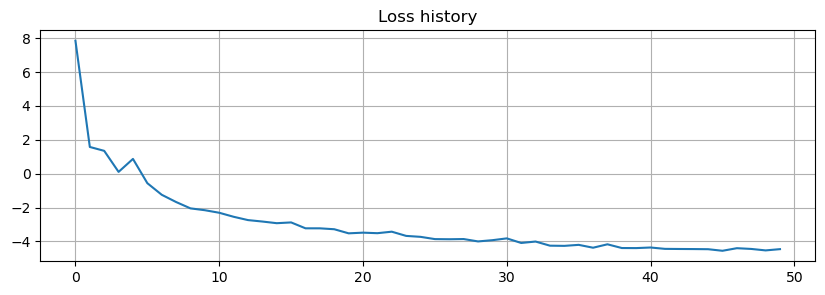

In [5]:
_, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(history.history["loss"])
ax.grid()
ax.set(title="Loss history")
plt.show()

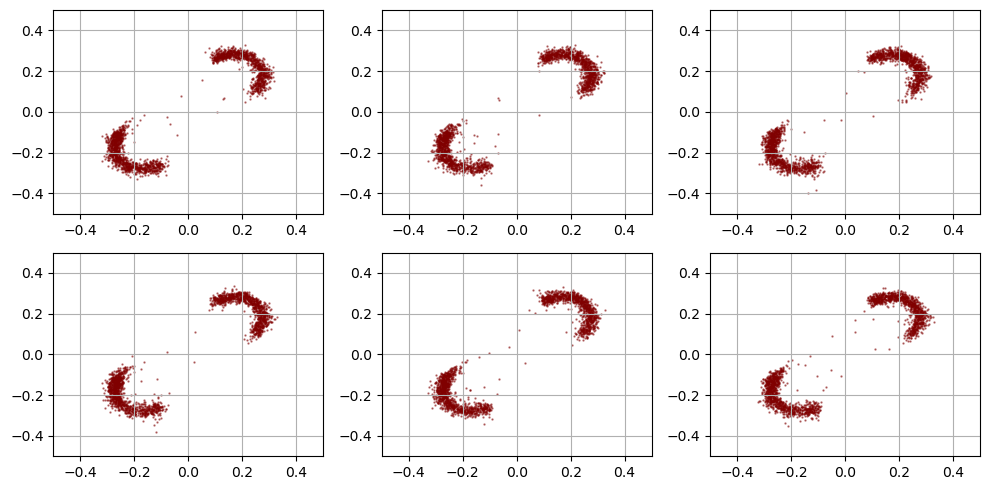

In [6]:
sample_size = (2048, 2)
origin_conditions = dict(x=keras.ops.zeros(sample_size))

fig, axs = plt.subplots(2, 3, figsize=(10,5))
for i in range(6):
    samples = approximator.sample((sample_size[0],), origin_conditions)["theta"]
    row = i // 3
    col = i % 3
    axs[row, col].scatter(x=samples[:, 0], y=samples[:, 1], s=0.5, alpha=0.5, color="maroon")
    axs[row, col].grid(True)
    axs[row, col].set_xlim(-0.5, 0.5)
    axs[row, col].set_ylim(-0.5, 0.5)

plt.tight_layout()
plt.show()